# RTBM Basic Tutorial

## Introduction

In this tutorial we will explain with examples how to operate with the RTBM package.
This package contains a python module with the following RTBM based objects:
- single RTBM 
- models based on layers (RTBM, linear, etc.)

These objects can be trained through multiple algorithms, however for the time being we will focus on genetic optimization.

## Importing the package

Before starting lets import this module:

In [2]:
import rtbm

and some useful library for the data generation and ploting:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1: RTBM density estimation

The rtbm.RTBM object allocates 1 RTBM with Nv and Nh, visible and hidden units.

In [4]:
a = rtbm.RTBM(1,1) # allocates 1 RTBM with (Nv=1,Nh=1)
# This object is intialized in probability mode, you can change it 
# by setting the mode flag in the constructor which takes the rtbm.RTBM.Mode options.
#        Args:
#            visible_units: number of visible units
#            hidden_units: number of hidden units
#            mode: see Mode enumerator (Mode.Probability, Mode.LogProbability, Mode.Expectation)
#            init_max_param_bound: size of maximum parameters used in random initialization.
#            random_bound: selects the maximum random value for the Schur complement initialization
#            phase: number which multiplies w and bh

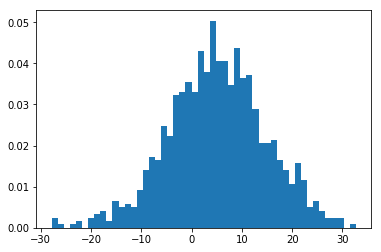

In [5]:
# lets generate some simple gaussian data
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

There are multiple minimization algorithms in `rtbm.minimizer`, here we will use the CMA.

In [6]:
# and now we load the CMA optimization algorithm
from rtbm import minimizer
minim = minimizer.CMA()

CMA on 1 cpu(s) enabled


In [7]:
# and now we train with the logarithmic error function (see rtbm.costfunctions)
from rtbm.costfunctions import logarithmic
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

# Here tolfun= is the stopping condition
# Alternatively, one can use maxiter = 

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=913545, Sat Nov  4 22:20:11 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.439489081901406e+04 1.0e+00 1.91e-01  2e-01  2e-01 0:00.0
    2     16 1.756124673144377e+04 1.3e+00 1.82e-01  2e-01  2e-01 0:00.1
    3     24 1.766015332809360e+04 1.3e+00 1.94e-01  2e-01  2e-01 0:00.1


/home/carrazza/repo/github/RTBM/rtbm/costfunctions.py:33: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(x))


   62    496 3.761511334289407e+03 7.4e+01 3.19e-02  2e-02  3e-02 0:03.2
  100    800 3.698062797965892e+03 1.8e+02 8.38e-02  2e-02  1e-01 0:05.1
  169   1352 3.692899977743344e+03 1.7e+03 4.68e-04  1e-05  3e-04 0:08.8
CMAEvolutionStrategyResult(xbest=array([ -1.15737836e-05,   1.51898721e-01,   6.52319520e-01,
         2.39639934e-01,   1.85775754e+00]), fbest=3692.8999775814309, evals_best=1340, evaluations=1352, iterations=169, xfavorite=array([ -8.08487074e-06,   1.51915220e-01,   6.52157895e-01,
         2.39565776e-01,   1.85753365e+00]), stds=array([  1.06641652e-05,   3.85896154e-05,   1.41240238e-04,
         6.98961582e-05,   2.84223043e-04]))


Then we check the output and compare to the input data:

/home/carrazza/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


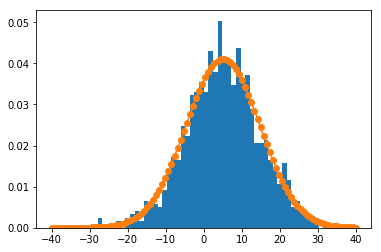

In [8]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

## Example 2: Model regression

In this example we show how to allocate and train a RTBM model.

In [8]:
# create a model with 3 layers of diagonal expectation units
from rtbm import model, layers

M = model.Model()
M.add(layers.DiagExpectationUnitLayer(1,3, Wmax=2,Bmax=2,Qmax=10,param_bound=10, phase=1))
M.add(layers.DiagExpectationUnitLayer(3,3,phase=1))
M.add(layers.DiagExpectationUnitLayer(3,1,phase=1))

# Xmax random initalization value cutoff
# param_bound overall maximum value parameters can take
# phase = 1: Phase I, phase =1j : Phase 2

Then we generate the data with noise:

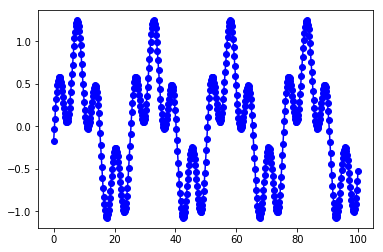

In [13]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],0).reshape((1,X.shape[1]))
plt.plot(X.flatten(), Y.flatten(),"ob-")

Finally we perform the regression with MSE cost:

In [24]:
from rtbm import minimizer
from rtbm.costfunctions import mse

minim = minimizer.CMA()
minim.train(mse(), M, X, Y, maxiter=1500)

CMA on 1 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=886049, Sat Nov  4 19:26:06 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 7.924266875127205e+00 1.0e+00 9.49e-01  9e-01  1e+00 0:00.3
    2     28 1.121044085739295e+01 1.1e+00 9.16e-01  9e-01  9e-01 0:00.5
    3     42 3.519403599595321e-01 1.1e+00 8.95e-01  9e-01  9e-01 0:00.8
   16    224 2.561758663787443e-01 1.3e+00 8.84e-01  8e-01  9e-01 0:03.8
   36    504 2.397123084856255e-01 1.5e+00 6.46e-01  6e-01  7e-01 0:07.9
   61    854 3.070458295789080e-01 1.7e+00 6.07e-01  5e-01  7e-01 0:13.0
   91   1274 2.023648586881780e-01 2.0e+00 3.79e-01  3e-01  4e-01 0:19.1
  100   1400 1.632805782757281e-01 2.2e+00 3.03e-01  2e-01  3e-01 0:20.9
  140   1960 1.878686607223447e-01 3.0e+00 2.85e-01  2e-01  3e-01 0:29.0
  185   2590 1.744788902465725e-01 4.0e+00 2.32e-01  2e-01  3e-01 0:38.1
  200   2800 1.663358172300278e-01 4.2e+00 2.17e-01  1e-01  3e-01 0:41.1
  255   3

array([-8.72766424,  4.95082224,  4.76005606,  0.13920204,  0.36961191,
       -1.97377798,  8.26576436,  4.03874835,  9.97219611,  9.14446637,
        4.32470595,  5.46238518, -0.96200683, -0.16259196, -1.38557347,
       -7.07268863, -0.94420629, -3.56804163,  4.53001272,  0.63142096,
       -2.48830845,  9.78031303,  5.34721852,  9.48642449, -5.73238098,
        2.48210126, -9.93787514, -0.12838118,  0.93520027])

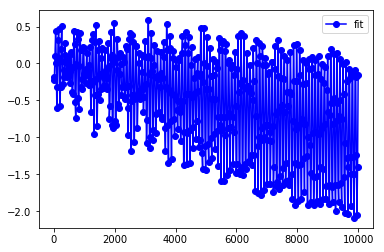

In [35]:
npoints = 500
test_X = (np.linspace(0, 10000, npoints)).reshape((1, npoints))

#plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"bo-", label='fit')
plt.legend()